In [30]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Задание 1

In [10]:
def check_normality(data):
    # Применяю тест Шапиро-Уилка
    stat, p_value = stats.shapiro(data)
    
    print(f"Статистика: {stat}, p-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

### Пример использования

In [13]:
data_normal = np.random.normal(0, 1, 1000)
data_not_normal = np.random.exponential(1, 1000)
print("Проверка нормальных данных:")
check_normality(data_normal)

print("\nПроверка ненормальных данных:")
check_normality(data_not_normal)

Проверка нормальных данных:
Статистика: 0.9970580267278885, p-значение: 0.06291303819904716
Не отклоняем нулевую гипотезу >> Данные распределены нормально

Проверка ненормальных данных:
Статистика: 0.822005382871166, p-значение: 7.11010529855511e-32
Отклоняем нулевую гипотезу >> Данные распределены не нормально


# Задание 2

In [18]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [24]:
t_stat, p_value = stats.ttest_ind(mens, womens)

alpha = 0.001
significant = p_value < alpha

print(f't-статистика: {t_stat:.2f}')
print(f'p-значение: {p_value:.2e}')
print(f'Результат значим при уровне значимости 𝛼 = {alpha}: {"Да" if significant else "Нет"}')

t-статистика: 28.31
p-значение: 4.01e-176
Результат значим при уровне значимости 𝛼 = 0.001: Да


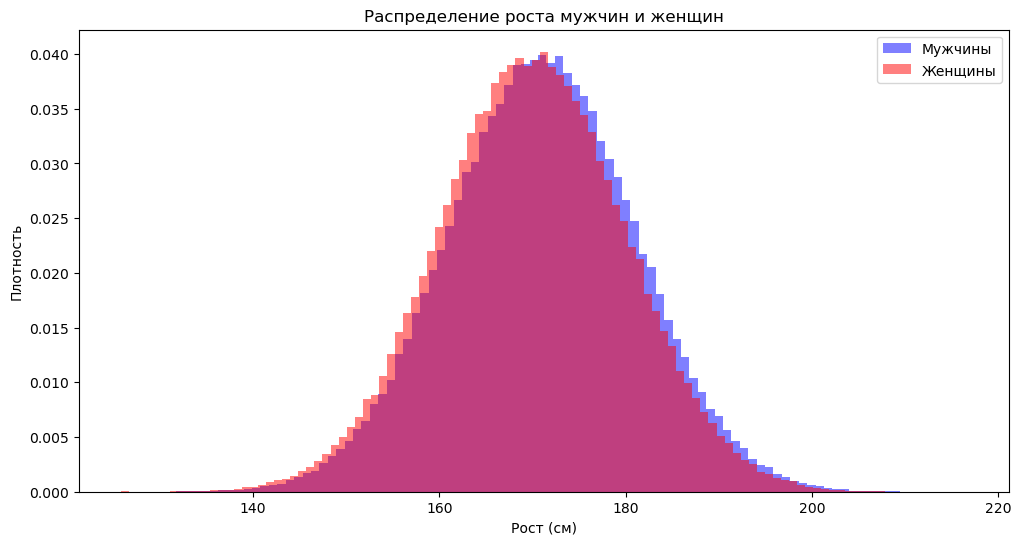

Практическая значимость результата: да


In [37]:
plt.figure(figsize=(12, 6))

# Гистограмма для мужчин
plt.hist(mens, bins=100, alpha=0.5, label='Мужчины', color='blue', density=True)

# Гистограмма для женщин
plt.hist(womens, bins=100, alpha=0.5, label='Женщины', color='red', density=True)

plt.legend()
plt.title('Распределение роста мужчин и женщин')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.show()

# Анализ практической значимости результата
mean_diff = abs(np.mean(mens) - np.mean(womens))
practical_significance = "нет" if mean_diff < 1 else "да"
print(f'Практическая значимость результата: {practical_significance}')

# Задание 3

In [41]:
test_team = [6.2, 7.1, 1.5, 2.3, 2.0, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2, 3.4]

In [51]:
# Проверка нормальности с помощью теста Шапиро-Уилка
shapiro_test_team = stats.shapiro(test_team)
shapiro_developer_team = stats.shapiro(developer_team)

shapiro_test_team, shapiro_developer_team

(ShapiroResult(statistic=0.8326535022274413, pvalue=0.007648028759920075),
 ShapiroResult(statistic=0.7527354794901837, pvalue=0.000489113275069916))

In [53]:
# Проведение теста Манна-Уитни
mannwhitney_test = stats.mannwhitneyu(test_team, developer_team, alternative='two-sided')
mannwhitney_test

MannwhitneyuResult(statistic=147.5, pvalue=0.6914867155382572)

# Задание 4

In [63]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [67]:
f_statistic, p_value = stats.f_oneway(only_breast, only_formula, both)

print(f"Значение F-статистики: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть значимая разница между среднемесячным приростом веса в различных группах.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой разницы между среднемесячным приростом веса в различных группах.")

Значение F-статистики: 26.7013
p-value: 0.0000
Отвергаем нулевую гипотезу. Есть значимая разница между среднемесячным приростом веса в различных группах.
